In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from salary_prediction.data.processing import load_data

Loading the data

In [28]:
df = load_data("/Users/josephobukofe/salary_prediction/data/raw/Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


Investigating the data types of the features

In [30]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

Investigating the number of null values

In [31]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Descriptive statistics of the dataset

In [32]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Investigating the number of duplicated rows

In [33]:
print('Duplicated Rows: %s' % df.duplicated().sum())

Duplicated Rows: 0


In [34]:
df_copy = df.copy()

### Exploratory Data Analysis

#### Univariate Analysis

Distribution of the years of experience

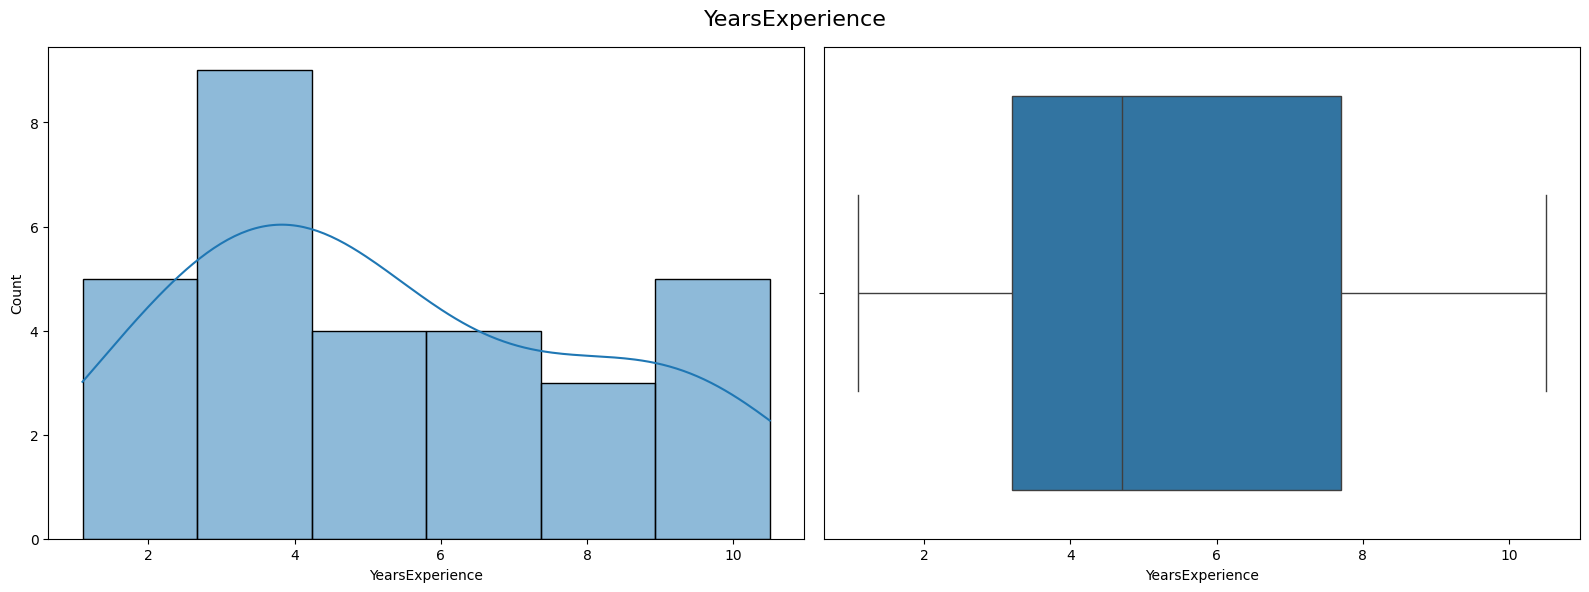

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 6))
fig.suptitle("YearsExperience", fontsize=16)

sns.histplot(data=df_copy, x = "YearsExperience", kde = True, ax=axes[0])
sns.boxplot(data=df_copy, x = "YearsExperience", ax=axes[1])

plt.tight_layout()
plt.show()

Distribution of Salaries

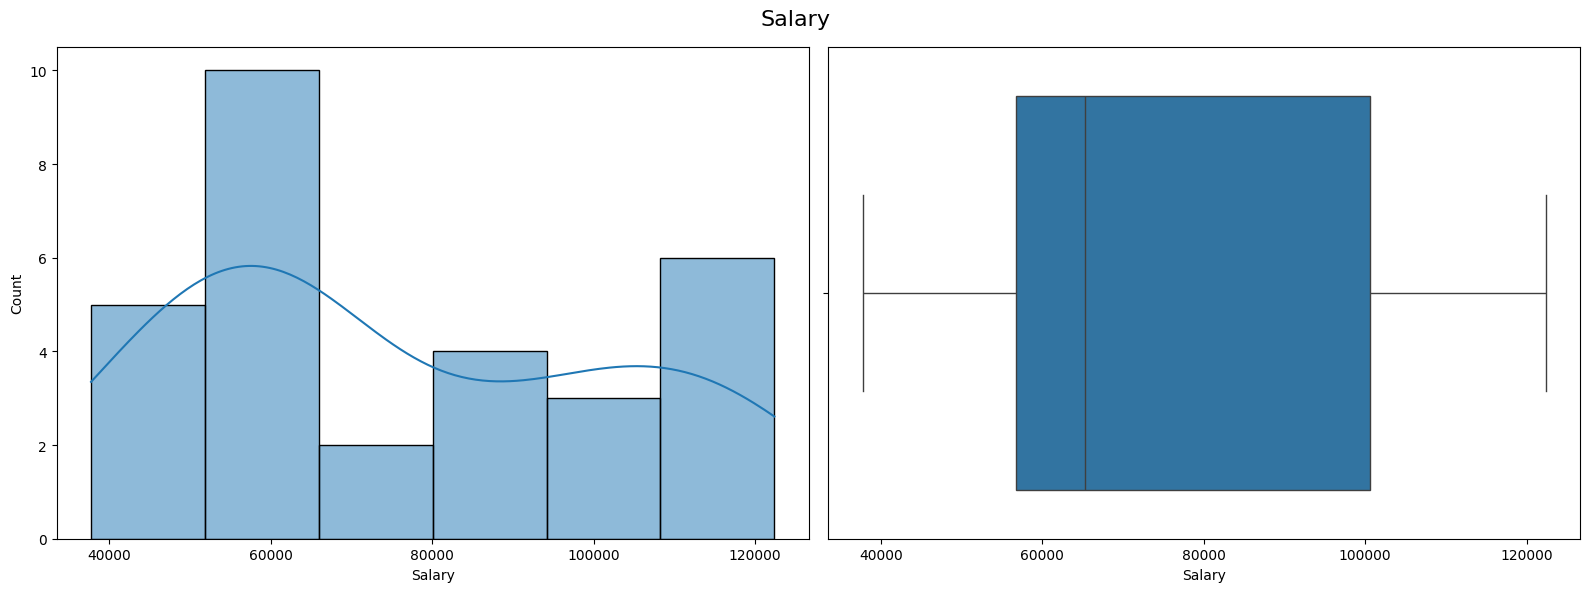

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 6))
fig.suptitle("Salary", fontsize=16)

sns.histplot(data=df_copy, x = "Salary", kde = True, ax=axes[0])
sns.boxplot(data=df_copy, x = "Salary", ax=axes[1])

plt.tight_layout()
plt.show()

#### Bivariate Analysis

Correlation Analysis

Investigating the extent of correlation between features

In [37]:
correlation_matrix = df_copy.corr()
salary_correlations = correlation_matrix["Salary"].sort_values(ascending=False)
salary_correlations

Salary             1.000000
YearsExperience    0.978242
Name: Salary, dtype: float64

Correlation matrix indicating the correlation coefficients between salary and years of experience

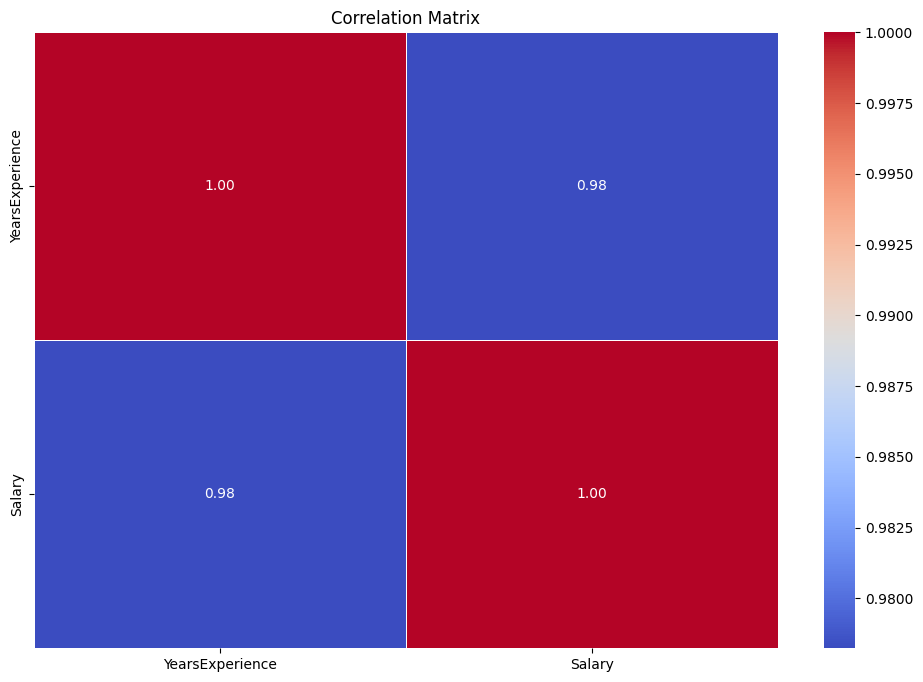

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt="0.2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Saving the data for model use

In [39]:
# df_copy.to_csv("/Users/josephobukofe/salary_prediction/data/processed/processed_salary_data.csv")